<a href="https://colab.research.google.com/github/GKurek94/Data-Science-projects/blob/develop/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Performance project with few cases

## Visualisation of relationship between two variables: "parental level of educaction" and "lunch". 


Common sense tells us, that high parental level of education is connected with high income. The interesting case is, if the high income affects into better lunches for parent's children. 

### Importing crucial libraries. Data preprocessing.

In [68]:
import pandas as pd
pd.__version__
import numpy as np
import plotly.express as px
import matplotlib
import seaborn as sns

Loading data.

In [2]:
StudentsPerformance = pd.read_csv('StudentsPerformance.csv')
StudentsPerformance

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Preliminary data preparation with view of some statistical information about the data.

In [4]:
StudentsPerformance.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
StudentsPerformance.describe()
StudentsPerformance.columns = [col.replace(' ','_') for col in StudentsPerformance.columns]

In [6]:
df = StudentsPerformance[['lunch','parental_level_of_education']]
df

,lunch,parental_level_of_education
0,standard,bachelor's degree
1,standard,some college
2,standard,master's degree
3,free/reduced,associate's degree
4,standard,some college
...,...,...
995,standard,master's degree
996,free/reduced,high school
997,free/reduced,high school
998,standard,some college


In [7]:
df.parental_level_of_education.value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

Creating an array with value of parental level of education and their amount of people in that dataset. 

In [8]:
list_parental_lvl = list(df.parental_level_of_education.value_counts().nlargest(6))
weights = [3/6, 4/6, 2/6, 1/6, 5/6, 6/6]
zipped = zip(weights, list_parental_lvl)
edu_lvl_weighted = list(zipped)
edu_lvl_weighted = sorted(edu_lvl_weighted, key = lambda t: t[0])
edu_lvl_weighted

[(0.16666666666666666, 179),
 (0.3333333333333333, 196),
 (0.5, 226),
 (0.6666666666666666, 222),
 (0.8333333333333334, 118),
 (1.0, 59)]

### First visualization using plotly libraray. Interactive chart and increasing level of education makes this visualization outstanding. 

In [9]:
lista1= []
lista2= []
lista_names = ["some high school","high school", "associate's degree","some college", "bachelor's degree","master's degree"]
for ele in edu_lvl_weighted:
  lista1.append(ele[0])
  lista2.append(ele[1])
px.bar(x=lista_names, y=lista2, width = 700, title = "Amount of students with increasing level of education of their parents.")

### Second visualization using grouped values with matplotlib library. On chart above it's possible to see the relation between amount of luches in same level of parent's education. This chart is not sorted by level of education. 

In [ ]:
df2 = df.value_counts().to_frame().sort_index(ascending=True)
df2

0
lunch        parental_level_of_education     
free/reduced associate's degree            77
             bachelor's degree             44
             high school                   70
             master's degree               24
             some college                  79
             some high school              61
standard     associate's degree           145
             bachelor's degree             74
             high school                  126
             master's degree               35
             some college                 147
             some high school             118

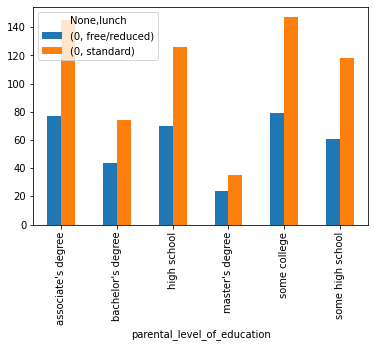

In [ ]:
df2.unstack(level=0).plot(kind='bar', subplots=False)

### Third chart about case on level of education of parents and their childrens type of lunch. On the chart the precantage relation is shown. Matplotlib is used in this case. 

In [10]:
df3 = df.groupby('parental_level_of_education')['lunch'].value_counts().to_frame()
df3

lunch
parental_level_of_education lunch              
associate's degree          standard        145
                            free/reduced     77
bachelor's degree           standard         74
                            free/reduced     44
high school                 standard        126
                            free/reduced     70
master's degree             standard         35
                            free/reduced     24
some college                standard        147
                            free/reduced     79
some high school            standard        118
                            free/reduced     61

Exemplary precentage ratio was calculated.

In [11]:
round(df3['lunch']["associate's degree"]['standard']/sum(df3['lunch']["associate's degree"]), 3)

0.653

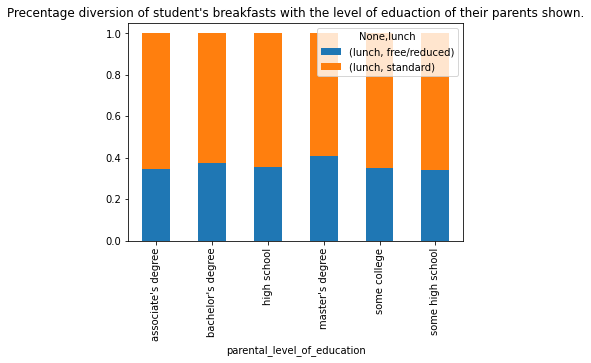

In [12]:
df4 = df3.groupby(level='parental_level_of_education')['lunch'].apply(lambda y: y / y.sum()).to_frame()
df4.unstack(level=1).plot(kind='bar', subplots=False, title = "Precentage diversion of student's breakfasts with the level of eduaction of their parents shown.", stacked=True)

 The goal of this project was to find not obviously interesting case in this dataset. Correlation between parents's level of education and their child's breakfast should be related to financial aspect of family, which seemed interesting.

## Correlation between variables

### Data Preprocessing 

Creating copy of raw dataset. Checking if there is any duplicated arrays.

In [16]:
dff = StudentsPerformance.copy()
dff[dff.duplicated()]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


Creating list of category columns made of object values.

In [17]:
category_columns = [column for column in df.columns if df[column].dtype == 'O']
category_columns

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']


Changing type of those columns to category.

In [18]:
for column in category_columns:
  dff[column] = dff[column].astype('category')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental_level_of_education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test_preparation_course      1000 non-null   category
 5   math_score                   1000 non-null   int64   
 6   reading_score                1000 non-null   int64   
 7   writing_score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.1 KB


In [19]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [20]:
dff.describe(include=['category']).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental_level_of_education,1000,6,some college,226
lunch,1000,2,standard,645
test_preparation_course,1000,2,none,642


Creating new column with contains sum of exams score which will be the target column.

In [ ]:
dff['score'] = dff['math_score'] + dff['reading_score'] + dff['writing_score']


Deleting unused columns.

In [36]:
dff = dff.drop('math_score', axis=1)
dff = dff.drop('reading_score', axis=1)
dff = dff.drop('writing_score', axis=1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,score
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229
5,female,group B,associate's degree,standard,none,232
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,282
996,male,group C,high school,free/reduced,none,172
997,female,group C,high school,free/reduced,completed,195
998,female,group D,some college,standard,completed,223


In [69]:
dff_dummies = pd.get_dummies(dff)
corr = dff_dummies.corr(method='pearson', min_periods=1)
corr

,score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
score,1.000000,0.118754,-0.118754,-0.105870,-0.083388,-0.030272,0.061064,0.145351,0.081016,0.095273,-0.178417,0.111968,0.023180,-0.074969,-0.286256,0.286256,0.251883,-0.251883
gender_female,0.118754,1.000000,-1.000000,-0.074423,0.045755,0.059596,-0.042561,-0.017087,-0.000845,0.007652,-0.026818,0.039790,0.008508,-0.011357,0.037291,-0.037291,0.006299,-0.006299
gender_male,-0.118754,-1.000000,1.000000,0.074423,-0.045755,-0.059596,0.042561,0.017087,0.000845,-0.007652,0.026818,-0.039790,-0.008508,0.011357,-0.037291,0.037291,-0.006299,0.006299
race/ethnicity_group A,-0.105870,-0.074423,0.074423,1.000000,-0.152337,-0.214673,-0.185562,-0.125910,-0.060464,0.012835,0.013336,-0.030695,-0.021792,0.082322,0.026153,-0.026153,-0.014999,0.014999
race/ethnicity_group B,-0.083388,0.045755,-0.045755,-0.152337,1.000000,-0.333807,-0.288540,-0.195785,-0.017124,-0.019160,0.078316,-0.052848,-0.042781,0.031705,0.013523,-0.013523,0.010591,-0.010591
race/ethnicity_group C,-0.030272,0.059596,-0.059596,-0.214673,-0.333807,1.000000,-0.406610,-0.275899,0.047253,0.017823,-0.008731,0.003981,-0.005046,-0.053401,-0.000059,0.000059,0.023407,-0.023407
race/ethnicity_group D,0.061064,-0.042561,0.042561,-0.185562,-0.288540,-0.406610,1.000000,-0.238485,-0.036170,-0.021825,-0.045514,0.080484,0.038226,0.013503,0.011745,-0.011745,-0.067628,0.067628
race/ethnicity_group E,0.145351,-0.017087,0.017087,-0.125910,-0.195785,-0.275899,-0.238485,1.000000,0.051410,0.014849,-0.030556,-0.022000,0.024929,-0.048978,-0.051702,0.051702,0.054462,-0.054462
parental_level_of_education_associate's degree,0.081016,-0.000845,0.000845,-0.060464,-0.017124,0.047253,-0.036170,0.051410,1.000000,-0.192981,-0.262279,-0.131366,-0.279864,-0.243565,-0.026029,0.026029,0.014090,-0.014090
parental_level_of_education_bachelor's degree,0.095273,0.007652,-0.007652,0.012835,-0.019160,0.017823,-0.021825,0.014849,-0.192981,1.000000,-0.186707,-0.093515,-0.199225,-0.173385,0.021751,-0.021751,0.017605,-0.017605


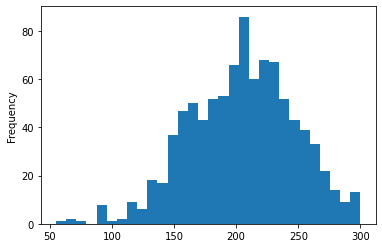

In [67]:
dff.score.plot(kind='hist', bins=30)

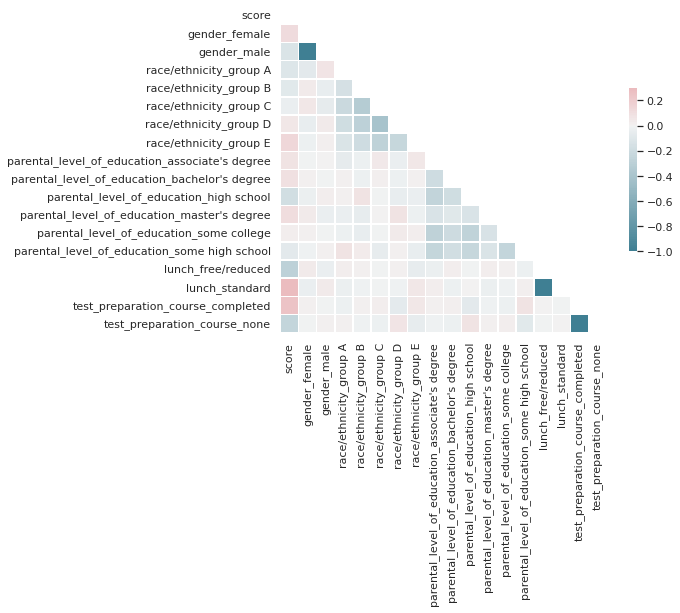

In [70]:
sns.set(style='white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
dff_dummies.corr()['score'].sort_values(ascending=False)

score                                             1.000000
lunch_standard                                    0.286256
test_preparation_course_completed                 0.251883
race/ethnicity_group E                            0.145351
gender_female                                     0.118754
parental_level_of_education_master's degree       0.111968
parental_level_of_education_bachelor's degree     0.095273
parental_level_of_education_associate's degree    0.081016
race/ethnicity_group D                            0.061064
parental_level_of_education_some college          0.023180
race/ethnicity_group C                           -0.030272
parental_level_of_education_some high school     -0.074969
race/ethnicity_group B                           -0.083388
race/ethnicity_group A                           -0.105870
gender_male                                      -0.118754
parental_level_of_education_high school          -0.178417
test_preparation_course_none                     -0.2518

Final conclusion about correlation between variables: The target variable was sum of scores of children. The most frequent score was around 200 value, which is ~70 per each test. The results of corr() function shows that the highest impact into score value was lunch. The second most-impactful variable was test preparation course.